## Linear regression and multiple linear regression with Association of Tennis Professionals data

Provided in *tennis_stats.csv* is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

The ATP men’s tennis dataset includes a wide array of tennis statistics.

**Identifying Data**<br>

Field|Description
:-----|:-----
Player|name of the tennis player
Year|year data was recorded

**Service Game Columns (Offensive)**<br>

Field|Description
:-----|:-----
Aces| number of serves by the player where the receiver does not touch the ball
DoubleFaults| number of times player missed both first and second serve attempts
FirstServe|% of first-serve attempts made
FirstServePointsWon|% of first-serve attempt points won by the playe
SecondServePointsWon|% of second-serve attempt points won by the player
BreakPointsFaced|number of times where the receiver could have won service game of the player
BreakPointsSaved|% of the time the player was able to stop the receiver from winning service game when they had the chance
ServiceGamesPlayed|total number of games where the player served
ServiceGamesWon|total number of games where the player served and won
TotalServicePointsWon|% of points in games where the player served that they won

**Return Game Columns (Defensive)**<br>

Field|Description
:-----|:-----
FirstServeReturnPointsWon| % of opponents first-serve points the player was able to win
SecondServeReturnPointsWon |% of opponents second-serve points the player was able to win
BreakPointsOpportunities|number of times where the player could have won the service game of the opponent
BreakPointsConverted|% of the time the player was able to win their opponent’s service game when they had the chance
ReturnGamesPlayed|total number of games where the player’s opponent served
ReturnGamesWon|total number of games where the player’s opponent served and the player won
ReturnPointsWon|total number of points where the player’s opponent served and the player won
TotalPointsWon|% of points won by the player<br> <br>

**Outcomes**<br>

Field|Description
:-----|:-----
Wins|number of matches won in a year
Losses|number of matches lost in a year
Winnings|total winnings in USD($) in a year
Ranking|ranking at the end of year

## Import modules and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
tennis = pd.read_csv('tennis_stats.csv')

## Inspect data

In [3]:
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [ ]:
tennis.info()

In [ ]:
tennis.nunique()

In [ ]:
tennis.describe()

## Explore data

Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

In [ ]:
tennis_numeric = tennis.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr = tennis_numeric.corr()

In [ ]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,cmap="PiYG", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# function adapted from from stackoverflow: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(tennis_numeric):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = tennis_numeric.columns
    for i in range(0, tennis_numeric.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = tennis_numeric.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

correlations = get_correlations(tennis_numeric)
correlations.to_csv('correlations.csv')

#### Strong Absolute Correlations ( > 0.70)
- *47 pairwise correlations are above 0.70* <br>
- *The highest correlations are among proxies for number of games played - those who play more games (return games and service games are more likely to have  more wins, losses, winnings, aces, breakpoints faced, breakpoint opportunities, and double faults.*<br>

#### Moderate Strong Absolute Correlations ( 0.70 > 0.50)
- *8 pairwise correlations are between 0.70 and 0.35*<br>
- *Many of the moderate strong correlations are among the overall number of points, and number of points won during various elements of the game (first serve points one, second serve points won, total points won) OR the number of points won during service/return games and service/return game wins.*<br>

#### Moderate Weak Absolute Correlations ( 0.50 > 0.30)
- *58 pairwise correlations are between 0.50 and 0.30*<br>
- *Proxies for games played (return games played, service games played) have moderate-weak correlations with total points won, total service points and service games one.*<br>
- *Service games won, total points won, and total service points won have moderate-weak correlation with wins, losses, and winnings.*<br>

####  Weak Absolute Correlations ( 0.30 > 0)
- *141 pairwise correlations are below 0.30*<br>

#### Negative Correlations
- *Year has weak negative correlations with all other metrics; Year should be considered a categorical variable and excluded from this analysis.* <br>
- *Ranking has negative correlations with all other metrics, indicating that the metrics in this dataset are not necessarily the metrics that are used to calculate rankings.*<br>

## Linear Regression Model

Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

Head to the Codecademy forums and share your set of features that resulted in the highest test score for predicting your outcome. What features are most important for being a successful tennis player?

### Single Feature Regression - Model A

#### Split dataset into training and test set

In [58]:
# independent variable
x = tennis[['BreakPointsConverted']]

# depedent variable
y = tennis[['ReturnGamesWon']]

In [59]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [60]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 1)
(345, 1)
(1376, 1)
(345, 1)


#### Create Linear Regression Model

In [61]:
# reshape X
x = x.values.reshape(-1, 1)

In [62]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

#### Visualize results

Text(0.5, 1.0, 'Break Points Converted v. Return Games Won')

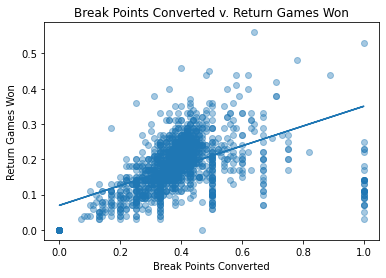

In [64]:
plt.clf()
plt.scatter(x,y,alpha=0.4)
plt.plot(x_test, y_predict)
plt.xlabel("Break Points Converted")
plt.ylabel("Return Games Won")
plt.title("Break Points Converted v. Return Games Won")

Text(0.5, 1.0, 'Return Games Won - actual v. predicted')

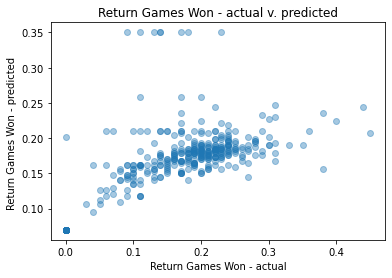

In [66]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("Return Games Won - actual")
plt.ylabel("Return Games Won - predicted ")
plt.title("Return Games Won - actual v. predicted")

#### Evaluate accuracy of model

In [67]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.32142595456598877

In [68]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.2896801649195031

### Single Feature Regression - Model B

#### Split dataset into training and test set

In [ ]:
# independent variable
x = tennis[['Aces']]

# depedent variable
y = tennis[['ServiceGamesWon']]

In [ ]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#### Create Linear Regression Model

In [90]:
# reshape X
x = x.values.reshape(-1, 1)

In [70]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

#### Visualize results

Text(0.5, 1.0, 'Aces v. Service Games Won')

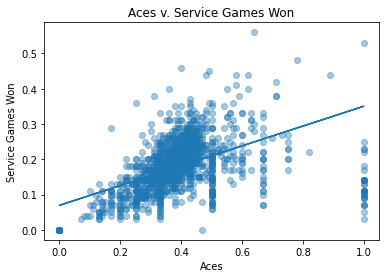

In [71]:
plt.clf()
plt.scatter(x,y,alpha=0.4)
plt.plot(x_test, y_predict)
plt.xlabel("Aces")
plt.ylabel("Service Games Won")
plt.title("Aces v. Service Games Won")

Text(0.5, 1.0, 'Service Games Won - actual v. predicted')

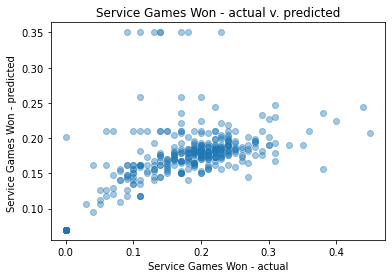

In [73]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("Service Games Won - actual")
plt.ylabel("Service Games Won - predicted ")
plt.title("Service Games Won - actual v. predicted")

#### Evaluate accuracy of model

In [ ]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

In [ ]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

### Single Feature Regression - Model C

#### Split dataset into training and test set

In [74]:
# independent variable
x = tennis[['ReturnGamesWon']]

# depedent variable
y = tennis[['Wins']]

In [75]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 1)
(345, 1)
(1376, 1)
(345, 1)


#### Create Linear Regression Model

In [77]:
# reshape X
x = x.values.reshape(-1, 1)

In [78]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

#### Visualize results

Text(0.5, 1.0, 'Return Games Won v. Wins')

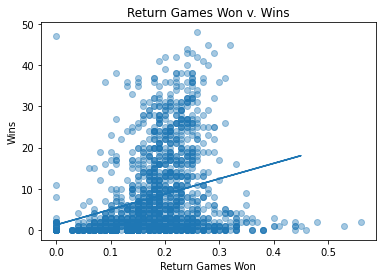

In [79]:
plt.clf()
plt.scatter(x,y,alpha=0.4)
plt.plot(x_test, y_predict)
plt.xlabel("Return Games Won")
plt.ylabel("Wins")
plt.title("Return Games Won v. Wins")

Text(0.5, 1.0, 'Wins - actual v. predicted')

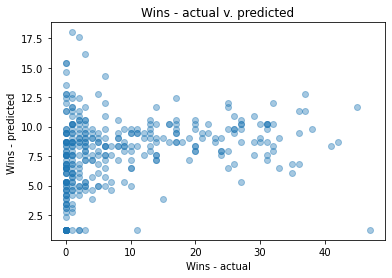

In [80]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("Wins - actual")
plt.ylabel("Wins - predicted ")
plt.title("Wins - actual v. predicted")

#### Evaluate accuracy of model

In [81]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.0921551614833771

In [82]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.057957012042447964

### Two Feature Regression - Model D

#### Split dataset into training and test set

In [83]:
# independent variable
x = tennis[['ReturnGamesWon','ServiceGamesWon']]

# depedent variable
y = tennis[['TotalPointsWon']]

In [84]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [85]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 2)
(345, 2)
(1376, 1)
(345, 1)


#### Create Linear Regression Model

In [86]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

In [87]:
# print mlr coefficients
print(regr.coef_)

[[0.23727013 0.22556675]]


#### Compare model results to actual results

In [88]:
# define characteristics
player_a = [[0.11, 0.5]]
predict = regr.predict(player_a)
print('Predicted points won %.2f' % predict)
print('Actual points won: 0.43')

Predicted points won 0.41
Actual points won: 0.43


#### Visualize results

Text(0.5, 1.0, 'actual points won v. predicted points won')

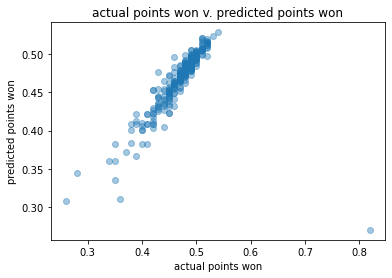

In [89]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual points won")
plt.ylabel("predicted points won")
plt.title("actual points won v. predicted points won")

#### Evaluate accuracy of model

In [12]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.905737260443044

In [13]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.41814135916681927

### Two Feature Regression - Model E

#### Split dataset into training and test set

In [19]:
# independent variable
x = tennis[['ReturnPointsWon','TotalServicePointsWon']]

# depedent variable
y = tennis[['TotalPointsWon']]

In [20]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 2)
(345, 2)
(1376, 1)
(345, 1)


#### Create Linear Regression Model

In [22]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

In [23]:
# print mlr coefficients
print(regr.coef_)

[[0.43257226 0.47484703]]


#### Compare model results to actual results

In [24]:
# define characteristics
player_a = [[0.34, 0.59]]
predict = regr.predict(player_a)
print('Predicted points won %.2f' % predict)
print('Actual points won: 0.45')

Predicted points won 0.47
Actual points won: 0.45


#### Visualize results

Text(0.5, 1.0, 'actual points won v. predicted points won')

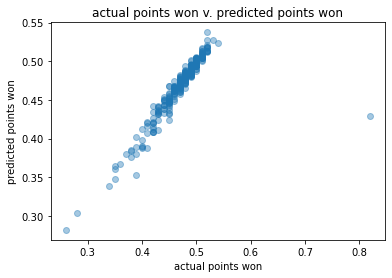

In [25]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual points won")
plt.ylabel("predicted points won")
plt.title("actual points won v. predicted points won")

#### Evaluate accuracy of model

In [26]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.9654775933890907

In [27]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.7134431342342351

### Multiple Linear Regression - Model F

#### Split dataset into training and test set

In [28]:
# independent variable
x = tennis[['ReturnPointsWon','TotalServicePointsWon','Wins','Losses']]

# depedent variable
y = tennis[['Winnings']]

In [29]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 4)
(345, 4)
(1376, 1)
(345, 1)


#### Create Linear Regression Model

In [31]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

In [32]:
# print mlr coefficients
print(regr.coef_)

[[  8588.59539371 155191.15944261  16230.26874532   7985.59562973]]


#### Compare model results to actual results

In [37]:
# define characteristics
#x = tennis[['ReturnPointsWon','TotalServicePointsWon','Wins','Losses']]
player_a = [[0.34, 0.61,1,4]]
predict = regr.predict(player_a)
print('Predicted winnings $%.2f' % predict)
print('Actual winnings: $25,635')

Predicted winnings $82020.26
Actual winnings: $25,635


#### Visualize results

Text(0.5, 1.0, 'actual winnings v. predicted winnings')

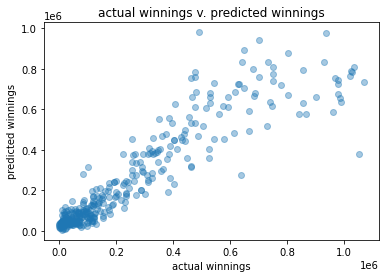

In [38]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual winnings")
plt.ylabel("predicted winnings")
plt.title("actual winnings v. predicted winnings")

#### Evaluate accuracy of model

In [39]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.8590539193503426

In [40]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.8411757586556757

### Multiple Linear Regression - Model G

#### Split dataset into training and test set

In [46]:
# independent variable
x = tennis[['ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsFaced','Aces','Wins','Losses']]

# depedent variable
y = tennis[['Winnings']]

In [47]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 6)
(345, 6)
(1376, 1)
(345, 1)


#### Create Linear Regression Model

In [49]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

In [50]:
# print mlr coefficients
print(regr.coef_)

[[ 1318.6591686   -659.49252882  -449.4265922    -62.65740685
  11368.87918898  4405.04015496]]


#### Compare model results to actual results

In [51]:
# define characteristics
# x = tennis[['ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsFaced','Aces','Wins','Losses']]
player_a = [[17,19,10,2,4,1]]
predict = regr.predict(player_a)
print('Predicted winnings $%.2f' % predict)
print('Actual winnings: $109,827')

Predicted winnings $85234.06
Actual winnings: $109,827


#### Visualize results

Text(0.5, 1.0, 'actual winnings v. predicted winnings')

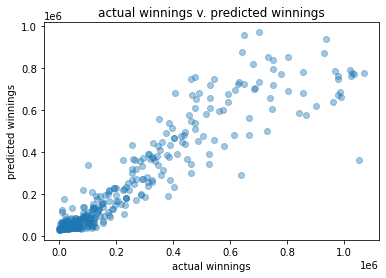

In [52]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual winnings")
plt.ylabel("predicted winnings")
plt.title("actual winnings v. predicted winnings")

#### Evaluate accuracy of model

In [53]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.8693242766589774

In [54]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.853382299327663